<a href="https://colab.research.google.com/github/vitskrieg/Brainstorm-de-Python/blob/main/Vis%C3%A3o_Computacional_O_Guia_Completo_Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão Computacional: O Guia Completo - Reconhecimento Facial

# OpenCV

## Carregamento da base de dados

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
from PIL import Image  #pacote de processamento de imagens
import cv2
import numpy as np     # vetores e matrizes
from google.colab.patches import cv2_imshow   
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile    #descompactar arquivos
path = '//content/drive/MyDrive/Visão Computacional_IA_Expert/Material 1/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #"file" ira receber path, e mode indica que esta em modo leitura
zip_object.extractall('./')   #local da extração, no caso, a pasta raiz do google colab
zip_object.close()

## Pré-processamento das imagens

In [ ]:
import os                                     #libera funcionalidades do prompt de comando
print(os.listdir('/content/yalefaces/train')) #listando diretorios/arquivos

['subject01.rightlight.gif', 'subject06.sad.gif', 'subject15.sleepy.gif', 'subject09.surprised.gif', 'subject03.centerlight.gif', 'subject15.surprised.gif', 'subject06.surprised.gif', 'subject06.sleepy.gif', 'subject12.glasses.gif', 'subject07.rightlight.gif', 'subject01.surprised.gif', 'subject11.noglasses.gif', 'subject01.leftlight.gif', 'subject11.surprised.gif', 'subject08.centerlight.gif', 'subject15.happy.gif', 'subject03.wink.gif', 'subject11.sleepy.gif', 'subject15.centerlight.gif', 'subject13.glasses.gif', 'subject10.happy.gif', 'subject11.rightlight.gif', 'subject04.centerlight.gif', 'subject11.centerlight.gif', 'subject15.noglasses.gif', 'subject08.happy.gif', 'subject09.happy.gif', 'subject15.wink.gif', 'subject04.happy.gif', 'subject04.wink.gif', 'subject06.centerlight.gif', 'subject02.normal.gif', 'subject02.noglasses.gif', 'subject12.surprised.gif', 'subject09.sleepy.gif', 'subject10.glasses.gif', 'subject13.leftlight.gif', 'subject14.sleepy.gif', 'subject07.normal.gif',

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] #estou juntando nome das imagens com o nome do diretorio, para termos o "path" de cada arquivo
  #print(paths)
  faces = []    #armazenar os pixels das imagens
  ids = []      #os ids das pessoas contidos nos nomes
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L') #cria variavel, ela recebe o objeto Image.open(caminho das imagens) e em seguida converte ela pra um formato PIL para podermos converter para GRAY
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8') #os parametros passados indicam que vamos armazenas matrizes de numeros inteiros
    #print(type(imagem_np))
    #print(os.path.split(path)[1])
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))#"split(path)" quebra o path
                                                                         #"split('.')"quebra o que possui "."
                                                                         #"replace('subject', '')" remove os subjects sobrando somente os ids
    #print(id)
    ids.append(id)          #lista com os ids
    faces.append(imagem_np) #lista com as imagens em array(matriz)
    
  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
#Quantos ids, quantas face

print("Numero de Ids:",len(ids))
print("Quantidade de faces:",len(faces))

Numero de Ids: 135
Quantidade de faces: 135


In [ ]:
#Face 1, numero de pixels da Face 1

faces[1], faces[1].shape

(array([[112,  97,  93, ..., 227, 225, 235],
        [241, 218, 211, ..., 246, 237, 242],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [196, 188, 192, ..., 232, 213, 223],
        [200, 193, 199, ..., 216, 197, 207],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [ ]:
243 * 320, 243 * 320 * 3

(77760, 233280)

## Treinamento do classificador LBPH

In [ ]:
8 * 8, 9 * 9

(64, 81)

In [ ]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)   #parametros
lbph_classifier.train(faces, ids)   #treinamento, passe as faces(vetores) e os ids(indices)
lbph_classifier.write('lbph_classifier.yml')    #nome do arquivo que vamos salvar como treinamento da detecção de faces

## Reconhecimento de faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()   #Criando o objeto 
lbph_face_classifier.read('/content/lbph_classifier.yml')     #Carregando o modelo ja treinado

In [ ]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif' #Teste 

In [ ]:
imagem = Image.open(imagem_teste).convert('L')   #conversão para escala de cinzas
imagem_np = np.array(imagem, 'uint8')            #transformando a imagem em vetor
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
imagem_np.shape

(243, 320)

In [ ]:
previsao = lbph_face_classifier.predict(imagem_np)    
previsao    #Essa imagem foi classificado pelo numero 10, que é o ID dessa imagem como esta
            #escrito no path dela
            #36.8 é a confiabilidade de que é esse mesmo valor

(10, 36.84750735484425)

In [ ]:
previsao[0] #Extraindo somente a classe

10

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

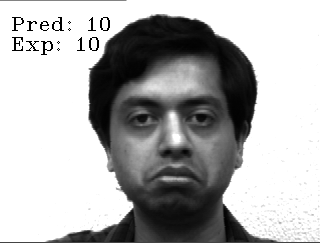

In [ ]:
#cv2.putText(imagem em vetor, 'texto' + id da imagem prevista, (posiçãox, posiçãoy), fonte, tamanho da fonte, cor)

cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

## Avaliação do classificador(ACCURACY)

1.Radius = raio de alcance dos px

2.Neighbors(vizinhos) =  numero de vizinhos, numero exatos de pixels ao redor que vão ser utilizados

3.grid_x,grid_y = quantidade e colunas usadas na 
plotagem do histograma

4.Threshold = confiabilidade

Todos estas informações você obtem baixando o arquivo do modelo treinado e o abrindo num editor de texto

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []          #saida prevista = o que queriamos
saidas_esperadas = []   #saidas esperadas = o que 
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [ ]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [ ]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [ ]:
previsoes

array([14,  9, 12,  7,  1, 10, 11, 12, 12,  5,  7,  6, 15, 14, 14,  4,  7,
        8,  4,  3, 13,  4,  3,  4, 11,  4,  5, 13,  9,  4])

In [ ]:
saidas_esperadas

array([14,  7, 12, 15,  1, 10, 11, 12,  2,  5,  7,  6, 15,  6, 14,  2,  9,
        8,  1,  3, 13,  4,  3,  4, 11,  8,  5, 13,  9, 10])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [ ]:
len(previsoes)

30

In [ ]:
(30 * 70) / 100

21.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

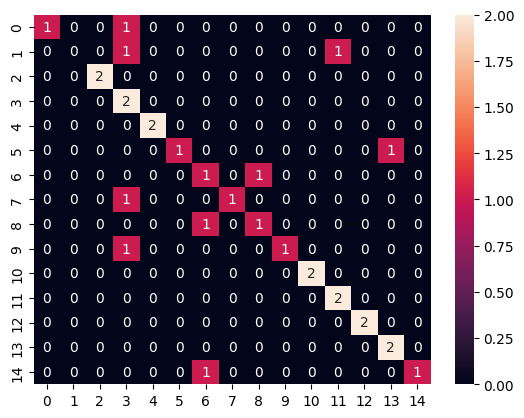

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

# Dlib

In [ ]:
import dlib

## Detecção de pontos faciais

In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Visão Computacional_IA_Expert/Material 1/Weights/shape_predictor_68_face_landmarks.dat')

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,0), 1)


  #print(pontos.parts())
  #print(len(pontos.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)

## Detecção de descritores faciais

In [ ]:
# Resnet: https://arxiv.org/abs/1512.03385
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t), (r,b), (0,0,255), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    #print(type(descritor_facial))
    #print(len(descritor_facial))
    #print(descritor_facial)
    descritor_facial = [f for f in descritor_facial]
    #print(descritor_facial)
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    #print(descritor_facial)
    #print(descritor_facial.shape)
    descritor_facial = descritor_facial[np.newaxis, :]
    #print(descritor_facial.shape)
    #print(descritor_facial)

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis = 0)
  
    index[idx] = path
    idx += 1
  #cv2_imshow(imagem_np)

In [ ]:
descritores_faciais.shape

In [ ]:
descritores_faciais

In [ ]:
index

In [ ]:
len(index)

## Cálculo da distância entre as faces

In [ ]:
descritores_faciais[131]

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[131])

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130])

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[129])

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[128])

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[119])

In [ ]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis = 1)

In [ ]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1))

In [ ]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1)[18]

## Detecção de faces com Dlib

In [ ]:
confianca = 0.5
previsoes = []
saidas_esperadas = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      nome_previsao = 'Face não identificada'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
previsoes

In [ ]:
saidas_esperadas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

# Exercício

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
path = '/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])
    
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

In [ ]:
faces

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)